In [2]:
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


In [56]:
def imagescan(i,df,filename,e,p):
    print("path",p)
    print("filename",filename)
    print("eye",e)
    # Load the image
    img = cv2.imread(p)
   
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    _, mask = cv2.threshold(gray_blur, 30, 255, cv2.THRESH_BINARY_INV)


    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    img_with_contours = img.copy()

    # Draw the contours on the image with a green color and thickness of 2 pixels
    #cv2.drawContours(img_with_contours, [contours[0]], -1, (0, 255, 0), 2)
    #cv2.drawContours(img_with_contours, [contours[1]], -1, (0, 0, 255), 2)

    # Show the image with the contours
    #cv2.imshow("Image with contours", img_with_contours)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    if(len(contours)>0): 
        pupil_contour = contours[0]
        if(len(pupil_contour)>=5):
            pupil_ellipse = cv2.fitEllipse(pupil_contour)
            pupil_center,pupil_size, pupil_angle =pupil_ellipse
            pupil_area = cv2.contourArea(pupil_contour)
            pupil_perimeter = cv2.arcLength(pupil_contour, True)
            (pupil_x, pupil_y), pupil_radius = cv2.minEnclosingCircle(pupil_contour)
            pupil_center = (int(pupil_x), int(pupil_y))
            pupil_diameter = pupil_radius * 2
            pupil_bbox = cv2.boundingRect(pupil_contour)
            #x, y, w, h = pupil_bbox
            #cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            #cv2.imshow('Pupil Bounding Box', img)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
            aspect_ratio = pupil_diameter / pupil_bbox[3]
            #orientation = pupil_angle
            # Compute circularity, eccentricity, roundness, and solidity
            circularity = (4 * np.pi * pupil_area) / (pupil_perimeter ** 2)
            #eccentricity = np.sqrt(1 - (min(ellipse[1]) ** 2) / (max(ellipse[1]) ** 2))
            roundness = (4 * pupil_area) / (np.pi * pupil_diameter ** 2)
            hull = cv2.convexHull(pupil_contour)
            convex_area = cv2.contourArea(hull)
            solidity = pupil_area / convex_area
            df.loc[i] = [filename,e,pupil_area,pupil_perimeter,aspect_ratio,pupil_diameter,convex_area,solidity]
        
    return df


In [57]:
df = pd.DataFrame(columns=['Imagename','which_eye','pupil_area','pupil_perimeter', 'Aspect_ratio_of_pupil', 'pupil_diameter','convex_area','solidity'])
i=-1
for dirname, _, filenames in os.walk('./iristestdata'):
    for filename in filenames:
        if(filename=="ReadMe.txt" or filename=="Thumbs.db"):
            continue
        else:
            d=dirname.split("\\")
            p=os.path.join(dirname, filename)
            i=i+1
            df=imagescan(i,df,filename,d[-1],p)

path ./iristestdata\1\left\aeval1.bmp
filename aeval1.bmp
eye left
path ./iristestdata\1\left\aeval2.bmp
filename aeval2.bmp
eye left
path ./iristestdata\1\left\aeval3.bmp
filename aeval3.bmp
eye left
path ./iristestdata\1\left\aeval4.bmp
filename aeval4.bmp
eye left
path ./iristestdata\1\left\aeval5.bmp
filename aeval5.bmp
eye left
path ./iristestdata\1\right\aevar1.bmp
filename aevar1.bmp
eye right
path ./iristestdata\1\right\aevar2.bmp
filename aevar2.bmp
eye right
path ./iristestdata\1\right\aevar3.bmp
filename aevar3.bmp
eye right
path ./iristestdata\1\right\aevar4.bmp
filename aevar4.bmp
eye right
path ./iristestdata\1\right\aevar5.bmp
filename aevar5.bmp
eye right
path ./iristestdata\10\left\fional1.bmp
filename fional1.bmp
eye left
path ./iristestdata\10\left\fional2.bmp
filename fional2.bmp
eye left
path ./iristestdata\10\left\fional3.bmp
filename fional3.bmp
eye left
path ./iristestdata\10\left\fional4.bmp
filename fional4.bmp
eye left
path ./iristestdata\10\left\fional5.bmp


path ./iristestdata\24\left\ngkokwhyl1.bmp
filename ngkokwhyl1.bmp
eye left
path ./iristestdata\24\left\ngkokwhyl2.bmp
filename ngkokwhyl2.bmp
eye left
path ./iristestdata\24\left\ngkokwhyl3.bmp
filename ngkokwhyl3.bmp
eye left
path ./iristestdata\24\left\ngkokwhyl4.bmp
filename ngkokwhyl4.bmp
eye left
path ./iristestdata\24\left\ngkokwhyl5.bmp
filename ngkokwhyl5.bmp
eye left
path ./iristestdata\24\right\ngkokwhyr1.bmp
filename ngkokwhyr1.bmp
eye right
path ./iristestdata\24\right\ngkokwhyr2.bmp
filename ngkokwhyr2.bmp
eye right
path ./iristestdata\24\right\ngkokwhyr3.bmp
filename ngkokwhyr3.bmp
eye right
path ./iristestdata\24\right\ngkokwhyr4.bmp
filename ngkokwhyr4.bmp
eye right
path ./iristestdata\24\right\ngkokwhyr5.bmp
filename ngkokwhyr5.bmp
eye right
path ./iristestdata\25\left\nkll1.bmp
filename nkll1.bmp
eye left
path ./iristestdata\25\left\nkll2.bmp
filename nkll2.bmp
eye left
path ./iristestdata\25\left\nkll3.bmp
filename nkll3.bmp
eye left
path ./iristestdata\25\left\nkll

path ./iristestdata\34\right\sitir2.bmp
filename sitir2.bmp
eye right
path ./iristestdata\34\right\sitir3.bmp
filename sitir3.bmp
eye right
path ./iristestdata\34\right\sitir4.bmp
filename sitir4.bmp
eye right
path ./iristestdata\34\right\sitir5.bmp
filename sitir5.bmp
eye right
path ./iristestdata\35\left\suzailil1.bmp
filename suzailil1.bmp
eye left
path ./iristestdata\35\left\suzailil2.bmp
filename suzailil2.bmp
eye left
path ./iristestdata\35\left\suzailil3.bmp
filename suzailil3.bmp
eye left
path ./iristestdata\35\left\suzailil4.bmp
filename suzailil4.bmp
eye left
path ./iristestdata\35\left\suzailil5.bmp
filename suzailil5.bmp
eye left
path ./iristestdata\35\right\suzailir1.bmp
filename suzailir1.bmp
eye right
path ./iristestdata\35\right\suzailir2.bmp
filename suzailir2.bmp
eye right
path ./iristestdata\35\right\suzailir3.bmp
filename suzailir3.bmp
eye right
path ./iristestdata\35\right\suzailir4.bmp
filename suzailir4.bmp
eye right
path ./iristestdata\35\right\suzailir5.bmp
fil

path ./iristestdata\6\right\christiner5.bmp
filename christiner5.bmp
eye right
path ./iristestdata\7\left\chualsl1.bmp
filename chualsl1.bmp
eye left
path ./iristestdata\7\left\chualsl2.bmp
filename chualsl2.bmp
eye left
path ./iristestdata\7\left\chualsl3.bmp
filename chualsl3.bmp
eye left
path ./iristestdata\7\left\chualsl4.bmp
filename chualsl4.bmp
eye left
path ./iristestdata\7\left\chualsl5.bmp
filename chualsl5.bmp
eye left
path ./iristestdata\7\right\chualsr1.bmp
filename chualsr1.bmp
eye right
path ./iristestdata\7\right\chualsr2.bmp
filename chualsr2.bmp
eye right
path ./iristestdata\7\right\chualsr3.bmp
filename chualsr3.bmp
eye right
path ./iristestdata\7\right\chualsr4.bmp
filename chualsr4.bmp
eye right
path ./iristestdata\7\right\chualsr5.bmp
filename chualsr5.bmp
eye right
path ./iristestdata\8\left\eugenehol1.bmp
filename eugenehol1.bmp
eye left
path ./iristestdata\8\left\eugenehol2.bmp
filename eugenehol2.bmp
eye left
path ./iristestdata\8\left\eugenehol3.bmp
filename 

In [58]:
df

,Imagename,which_eye,pupil_area,pupil_perimeter,Aspect_ratio_of_pupil,pupil_diameter,convex_area,solidity
0,aeval1.bmp,left,1375.5,177.438599,0.995916,44.816204,1521.0,0.904339
1,aeval2.bmp,left,1382.5,180.267026,0.996770,45.851429,1569.0,0.881134
2,aeval3.bmp,left,1394.0,180.852812,1.009373,45.421780,1551.5,0.898485
3,aeval4.bmp,left,1807.0,160.852812,0.985712,49.285603,1843.5,0.980201
4,aeval5.bmp,left,1573.0,150.367531,1.003071,46.141285,1608.5,0.977930
...,...,...,...,...,...,...,...,...
445,fatmar1.bmp,right,1356.5,185.095453,1.089573,49.030800,1665.5,0.814470
446,fatmar2.bmp,right,1300.0,207.480229,1.058105,48.672848,1694.0,0.767414
447,fatmar3.bmp,right,1343.0,198.166520,1.091733,50.219715,1759.0,0.763502
448,fatmar4.bmp,right,1081.0,193.823374,1.151756,48.373745,1548.5,0.698095


In [59]:
df.to_csv("pupildatasetf.csv")

In [60]:
# Calculate summary statistics
df.describe()

,pupil_area,pupil_perimeter,Aspect_ratio_of_pupil,pupil_diameter,convex_area,solidity
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,1632.772422,165.549693,1.026385,48.381159,1724.854260,0.941719
std,497.051127,30.160102,0.047421,7.114552,505.153141,0.067276
min,39.000000,55.112698,0.955259,19.105173,91.000000,0.428571
25%,1323.625000,145.599764,0.999839,43.825788,1397.500000,0.924356
50%,1594.750000,161.781744,1.014097,48.375498,1694.500000,0.971077
75%,1943.875000,181.923880,1.036120,52.823523,2032.625000,0.981169
max,3596.500000,321.320848,1.468538,71.887810,3673.000000,0.988605


In [61]:
df.isnull().sum()


Imagename                0
which_eye                0
pupil_area               0
pupil_perimeter          0
Aspect_ratio_of_pupil    0
pupil_diameter           0
convex_area              0
solidity                 0
dtype: int64

In [62]:
df.value_counts("which_eye")

which_eye
left     223
right    223
dtype: int64

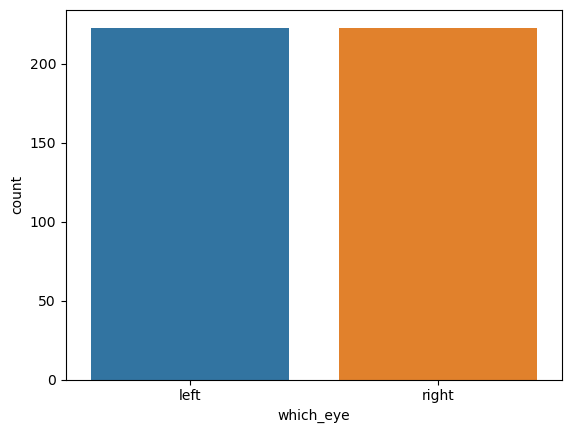

In [63]:
sns.countplot(x='which_eye', data=df, )
plt.show()

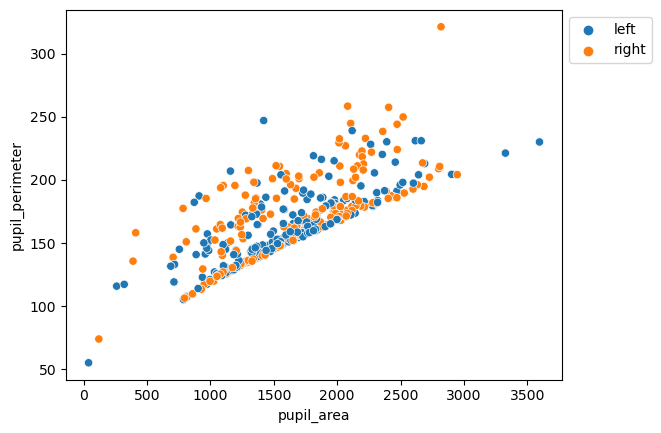

In [64]:
sns.scatterplot(x='pupil_area', y='pupil_perimeter', hue='which_eye', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


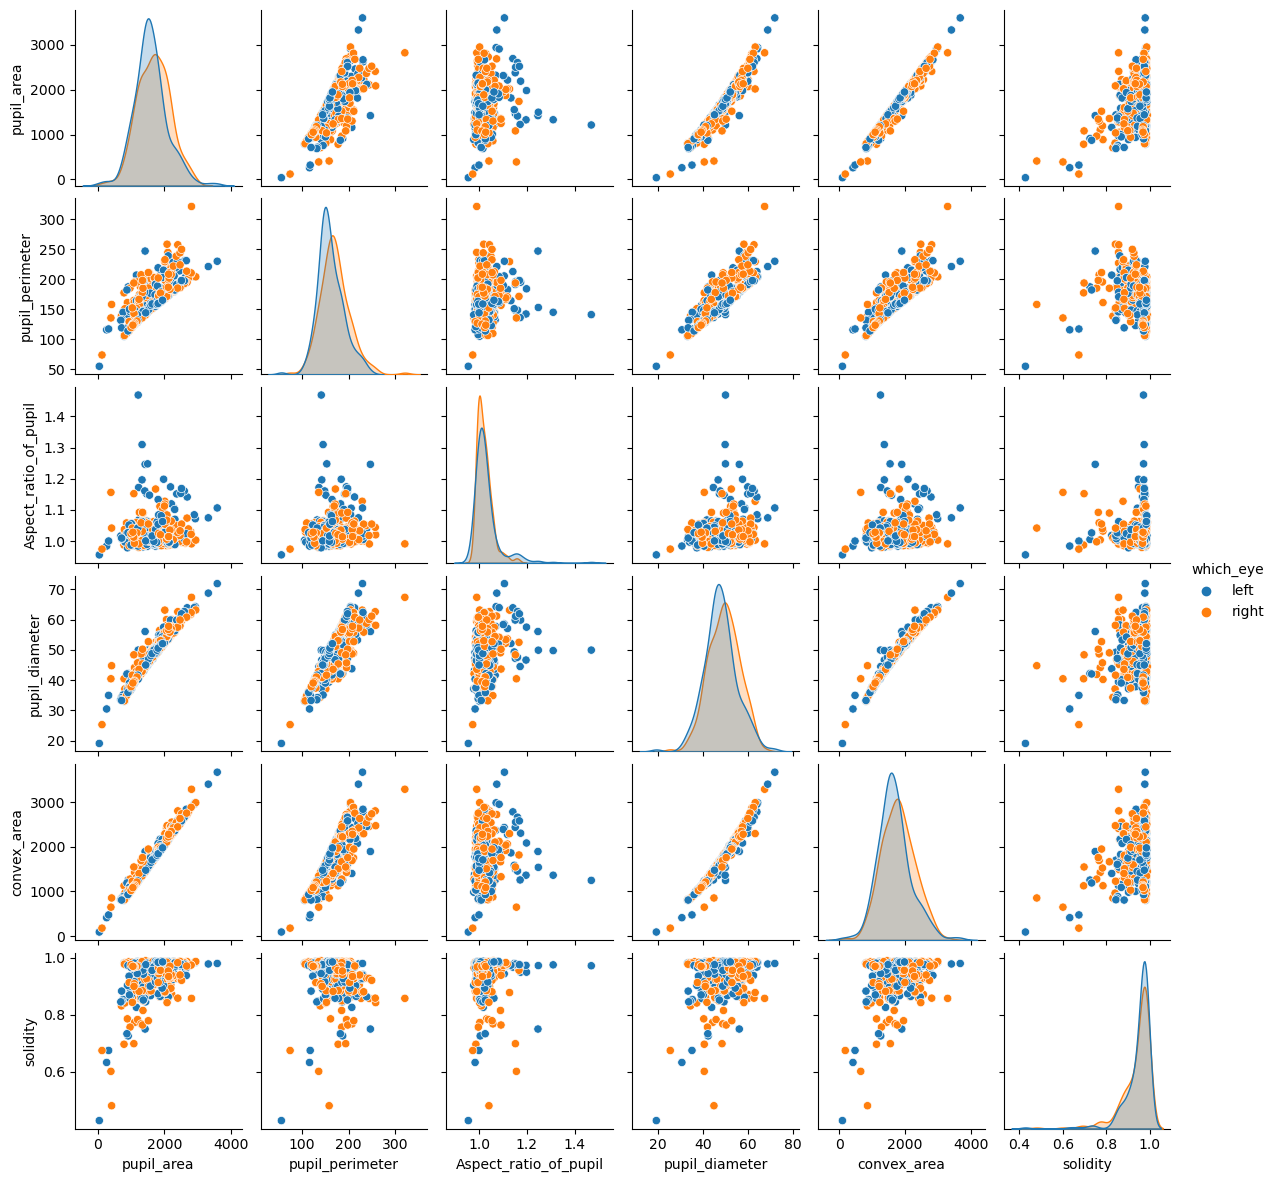

In [65]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='which_eye', height=2)


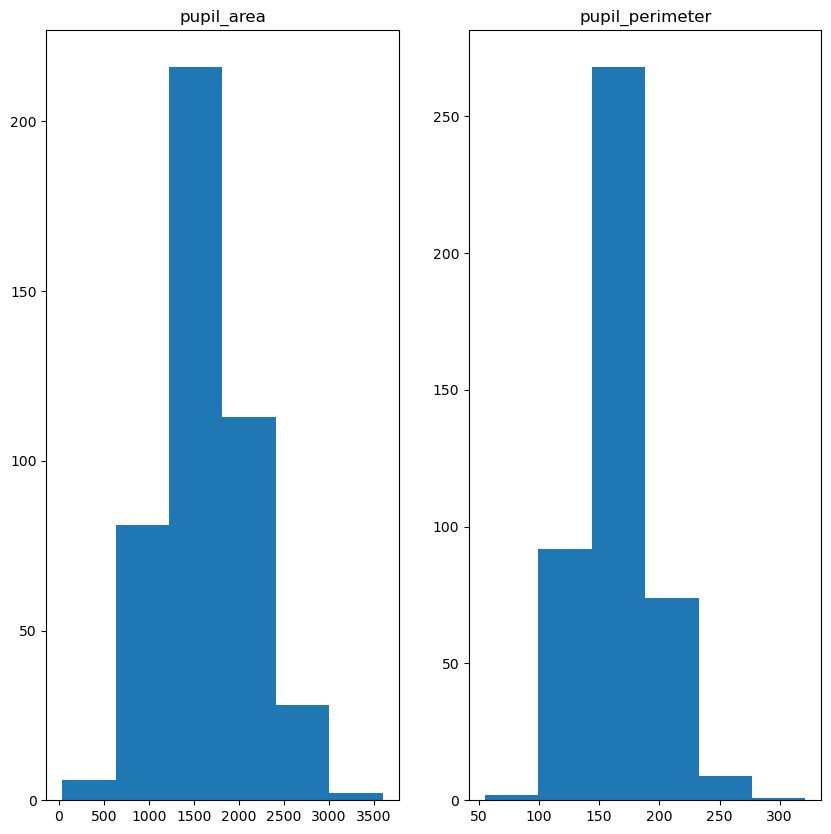

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].set_title("pupil_area")
axes[0].hist(df['pupil_area'], bins=6);
axes[1].set_title("pupil_perimeter")
axes[1].hist(df['pupil_perimeter'], bins=6);



C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

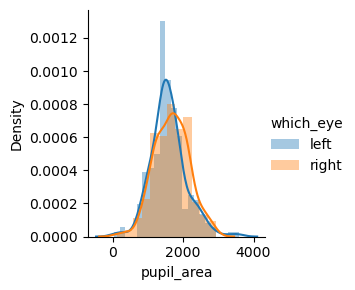

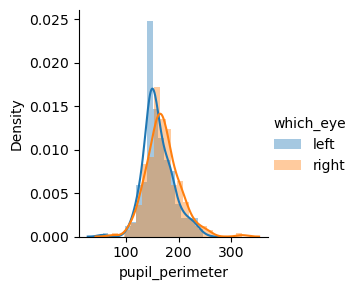

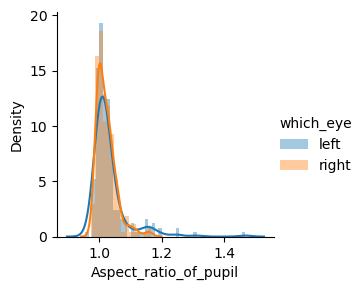

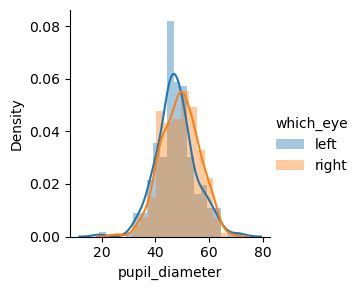

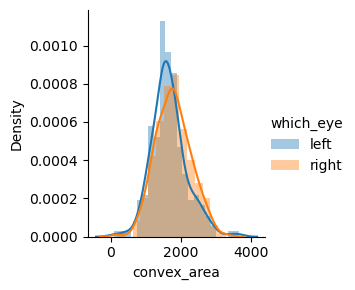

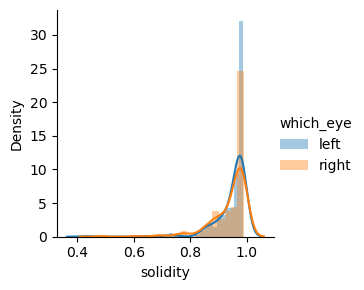

In [67]:
plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "pupil_area").add_legend()

plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "pupil_perimeter").add_legend()

plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "Aspect_ratio_of_pupil").add_legend()

plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "pupil_diameter").add_legend()

plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "convex_area").add_legend()

plot = sns.FacetGrid(df, hue="which_eye")
plot.map(sns.distplot, "solidity").add_legend()

plt.show()


In [70]:
df.corr(method='pearson')

,pupil_area,pupil_perimeter,Aspect_ratio_of_pupil,pupil_diameter,convex_area,solidity
pupil_area,1.000000,0.732872,0.099607,0.960062,0.984415,0.390012
pupil_perimeter,0.732872,1.000000,0.107396,0.839327,0.835019,-0.174562
Aspect_ratio_of_pupil,0.099607,0.107396,1.000000,0.213652,0.109958,-0.002712
pupil_diameter,0.960062,0.839327,0.213652,1.000000,0.982420,0.214884
convex_area,0.984415,0.835019,0.109958,0.982420,1.000000,0.249016
solidity,0.390012,-0.174562,-0.002712,0.214884,0.249016,1.000000


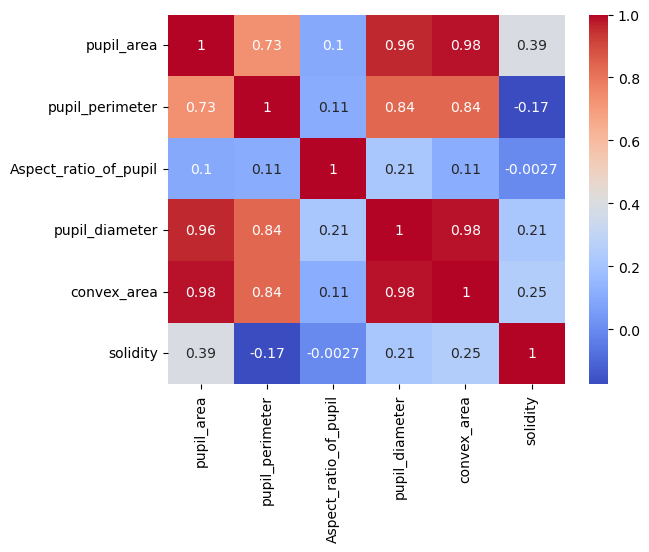

In [71]:
corr = df[['pupil_area', 'pupil_perimeter', 'Aspect_ratio_of_pupil', 'pupil_diameter','convex_area','solidity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<h1>Conclusions</h1>

1.pupil area, pupil perimeter, pupil diameter and convex_area has good correlation between them.
<br>2.The aspect_ratio_of_pupil and solidity has weak positive correlations with the other variables, indicating that it may not be as strongly related to the other variables as they are to each other.
<br>3.For right eye there is increase in area, perimeter when compared to left eye
<br>4.pupil area and pupil perimeter are proptional to each other
<br>5.convex area is propotional with puil area, pupil diameter for both left and right eye
<br>6.left eye has high aspect ratio that right eye
<br>7.pupil area and pupil perimeter are normally distributed
<br>8.pupil area and pupil perimeter are slightly right skewed for right eye when compared to left eye
<br>9.aspect ratio is left skewed for both right and left eyes
<br>10.solidity is right skewed for both right and left eyes
